In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df=pd.read_excel("./Food Delivery Time Prediction Case Study.xlsx")
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (45593, 11)
     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicl

In [3]:
df = df.dropna()   # drop missing values
df = df[df["Delivery_person_Age"] > 15]  # remove invalid ages

In [4]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    return R * c

In [5]:
df["distance_km"] = df.apply(lambda row: haversine(
    row["Restaurant_latitude"],
    row["Restaurant_longitude"],
    row["Delivery_location_latitude"],
    row["Delivery_location_longitude"]), axis=1)

In [6]:
df = df.drop(columns=["ID","Delivery_person_ID"])
for col in ["Type_of_order", "Type_of_vehicle"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
X = df.drop(columns=["Time_taken(min)"])
y = df["Time_taken(min)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [9]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [10]:
xg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)

In [11]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

In [12]:
evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xg_preds, "XGBoost")

Linear Regression Performance:
MAE: 6.58, RMSE: 8.34, R²: 0.21

Random Forest Performance:
MAE: 6.00, RMSE: 7.63, R²: 0.33

XGBoost Performance:
MAE: 5.70, RMSE: 7.22, R²: 0.40



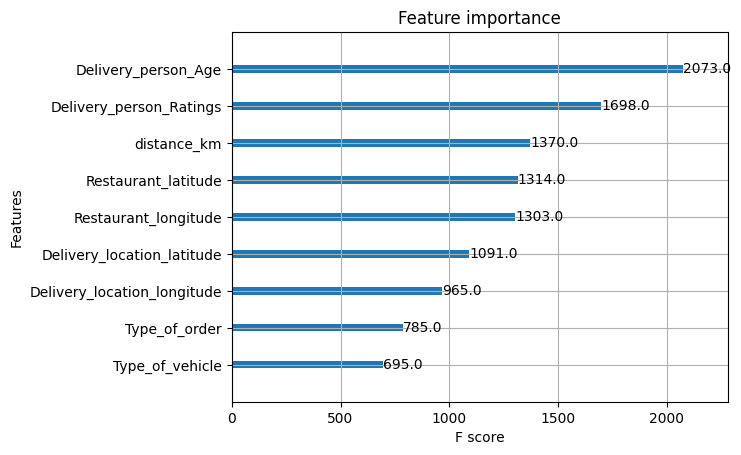

In [13]:
xgb.plot_importance(xg)
plt.show()

In [14]:
joblib.dump(xg, "delivery_time_model.pkl")

['delivery_time_model.pkl']